In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import stable_baselines3 as sb
from copy import deepcopy

from src.envs import board

In [35]:
starts = np.array([[0, 0], [3, 0], [3, 3]])
targets = np.array([[3, 0], [0, 0], [0, 3]])
obstacles = np.array([[1, 1]])
env = board.env(starts, targets, obstacles, max_timesteps=10).unwrapped.to_gym()

In [36]:
model = sb.DQN('MultiInputPolicy', env, verbose=2)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [37]:
from stable_baselines3.common.callbacks import EvalCallback
eval_env = deepcopy(env)
eval_callback = EvalCallback(eval_env,
                             n_eval_episodes=1,
                             eval_freq=10,
                             best_model_save_path='./logs/',
                             log_path='./logs/',
                             deterministic=True, render=False)

In [ ]:
model = sb.DQN('MultiInputPolicy', env, verbose=2)
model.learn(10000, callback=eval_callback)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


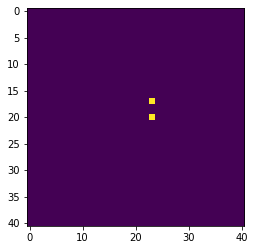

In [41]:
env.reset()
print(env.state['bot_0'])
import matplotlib.pyplot as plt
plt.imshow(env.state['bot_0'][0])